# England Premier League



In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
# The file path toward the EPL data (scores, attendances, weather)
epl_path = "../Resources/EPL_teams/"
data_file = os.path.join(epl_path, "EPL_scores_attendances.csv")
stadium_file = os.path.join("../Resources/", "England_stadiums.csv")

In [140]:
epl_all_data_df = pd.read_csv(data_file)
epl_all_data_df.head()

,Div,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HomeTeam ID,AwayTeam ID,City,Team ID,Opponent,Attendance
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,H,EPL9,EPL13,Liverpool,EPL9,Norwich City,53333.0
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,A,EPL18,EPL10,London,EPL18,Manchester City,59870.0
2,E0,2019-08-10,15:00,Watford,Brighton,0,3,A,EPL17,EPL3,Watford,EPL17,Brighton & Hove Albion,20245.0
3,E0,2019-08-10,17:30,Tottenham,Aston Villa,3,1,H,EPL16,EPL1,London,EPL16,Aston Villa,60407.0
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,EPL6,EPL7,London,EPL6,Everton,25151.0


In [17]:
np.arange(len(xticks))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## Home scores vs. Away scores 


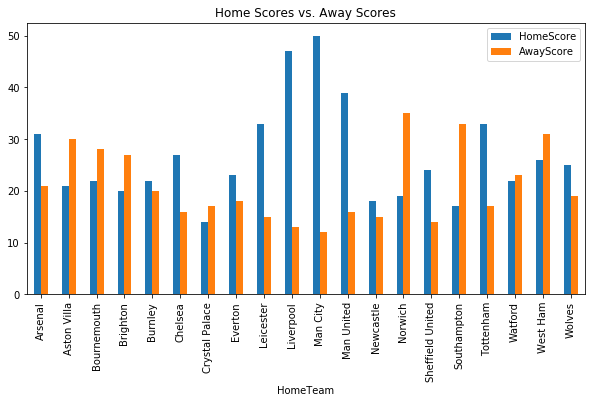

In [55]:
# Home scores vs. away scores sum
cols = ["Date", "HomeTeam", "HomeScore","AwayTeam", "AwayScore"]
scores_df = epl_all_data_df[cols]
scores_gp_team = scores_df.groupby("HomeTeam")
scores_sum = scores_gp_team[["HomeScore","AwayScore"]].sum()
scores_bar = scores_sum.plot.bar(width=0.5,figsize=(10, 5), rot=90)
scores_bar.set_title("Home Scores vs. Away Scores")
plt.show()

## Home Attendances vs. Away Attendances

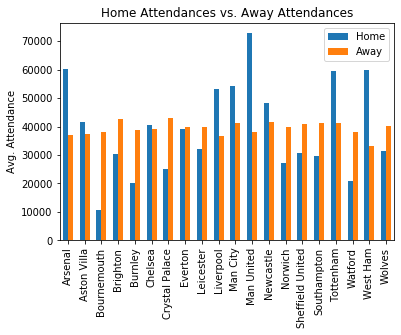

In [102]:
# Collect columns
cols = ["Date", "HomeTeam","AwayTeam", "Attendance"]
att_df = epl_all_data_df[cols]

# Attendances about Hometeam
att_gp_home = att_df.groupby("HomeTeam")
att_home = att_gp_home["Attendance"].mean()

# Attendances about Awayteam
att_gp_away = att_df.groupby("AwayTeam")
att_away = att_gp_away["Attendance"].mean()

# Bar plot
xticks = att_gp_home.indices.keys()
bar_width = 0.6
xval = np.arange(len(xticks))*2

fig, ax = plt.subplots()
ax.bar(xval-bar_width/2, att_home, width=bar_width, label="Home")
ax.bar(xval+bar_width/2, att_away, width=bar_width, label="Away")
ax.set_xlim(-1, 2*len(xticks)-1)
ax.set_xticks(xval)
ax.set_xticklabels(xticks, rotation='vertical')
ax.set_ylabel("Avg. Attendance")
ax.set_title("Home Attendances vs. Away Attendances")
ax.legend()
plt.show()
# Pie plot
#labels = att_gp_home.indices.keys()
#expld = [0]*len(labels)
#expld[0] = 0.2
#fig,ax = plt.subplots()
#ax.pie(att_home, explode=expld, labels=labels)
#plt.show()

## Attendances vs. Scores

nan --> 0

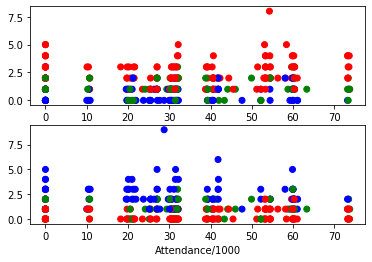

In [105]:
# Collect columns
cols = ["HomeTeam", "HomeScore", "AwayScore", "Result", "Attendance"]
epl_df = epl_all_data_df[cols]
epl_df = epl_df.fillna(0)
colors = epl_df["Result"].replace(["H","A","D"], ["r","b","g"])
# Scatter plot
xval = epl_df["Attendance"] / 1000
yval = [epl_df["HomeScore"], epl_df["AwayScore"]]
fig,(ax1,ax2)= plt.subplots(2)
ax1.scatter(xval, yval[0], c=colors,label="Home")
ax2.scatter(xval, yval[1], c=colors,label="Away")
ax2.set_xlabel("Attendance/1000")
#ax.set_title("Attendance vs. Score")
ax.legend()
plt.show()

## Occupancy vs. Scores ??

In [115]:
stadium_df = pd.read_csv(stadium_file)


,Date,Team ID,HomeScore,AwayScore,Attendance,Cap.
0,2019-08-09,EPL9,4,1,53333.0,54074
1,2019-08-10,EPL18,0,5,59870.0,60000
2,2019-08-10,EPL17,0,3,20245.0,21577
3,2019-08-10,EPL16,3,1,60407.0,62062
4,2019-08-10,EPL6,0,0,25151.0,25456
...,...,...,...,...,...,...
346,2020-07-12,EPL1,2,0,0.0,42682
347,2020-07-12,EPL19,3,0,0.0,31700
348,2020-07-12,EPL2,4,1,0.0,11360
349,2020-07-12,EPL16,2,1,0.0,62062


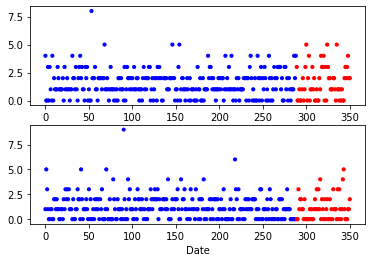

In [145]:

# line graph

## Date and score
cols = ["Date", "HomeTeam", "HomeTeam ID", "HomeScore", "AwayScore", "Attendance"]
date_score_df = epl_all_data_df[cols].rename(columns={"HomeTeam ID":"Team ID"})
cap_df = stadium_df[["Team ID", "Cap."]]
epl_date = pd.merge(date_score_df, cap_df, how="left", on="Team ID")
epl_date = epl_date.fillna(0)

# Scatter plot with different size
#xval = np.arange(len(epl_date["Date"]))
yval1 = epl_date["HomeScore"]
yval2 = epl_date["AwayScore"]
scalar = epl_date["Attendance"].div(epl_date["Cap."])
scalar = scalar.replace(0,1)

# count
total = len(epl_date["Date"])
after = len(epl_date.loc[epl_date["Date"] > "2020-04-01"] )
color = ["b"]*(total-after) + ["r"]*after

fig, (ax1,ax2) = plt.subplots(2)
ax1.scatter(xval, yval1, s=scalar*10, c=color, label="Home")
ax2.scatter(xval, yval2, s=scalar*10, c=color, label="Away")
ax2.set_xlabel("Date")
#ax.set_title("Attendance vs. Score")

plt.show()


## Date and attend

In [146]:
man_united = epl_df.loc[epl_df["HomeTeam"]=="Man United"]
man_united

,HomeTeam,HomeScore,AwayScore,Result,Attendance
8,Man United,4,0,H,73620.0
26,Man United,1,2,A,73454.0
43,Man United,1,0,H,73689.0
69,Man United,1,1,D,73201.0
88,Man United,1,1,D,73737.0
119,Man United,3,1,H,73556.0
139,Man United,2,2,D,73381.0
145,Man United,2,1,H,73252.0
168,Man United,1,1,D,63328.0
187,Man United,4,1,H,73206.0


In [8]:
def stat_plot(data_df, by_col):
    stat_df = data_df.groupby(by_col).agg(['sum', 'mean'])
    ax = stat_df.plot.bar(figsize = (10,5))
    return

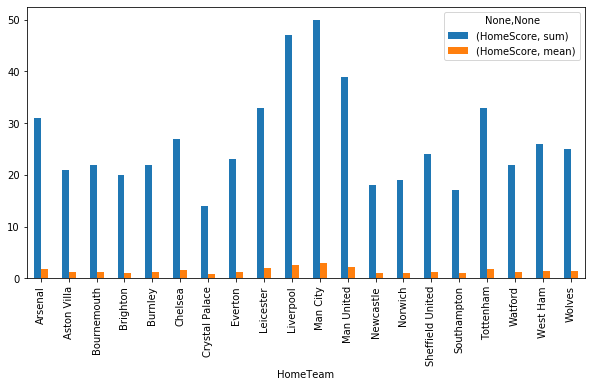

In [9]:
# Home Scores: plot 'sum' and 'avg' about teams
cols = ["Date", "HomeTeam", "HomeScore"]
stat_plot(epl_all_data_df[cols], "HomeTeam")

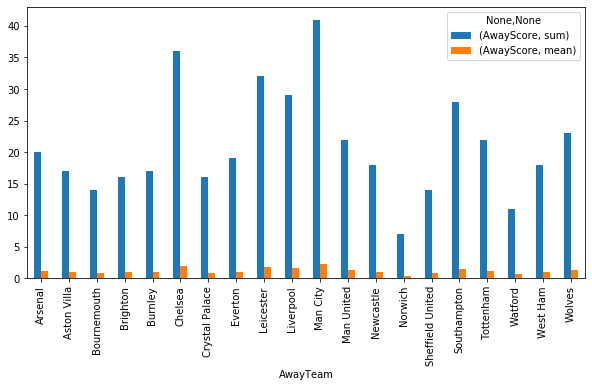

In [10]:
# Away Scores: plot 'sum' and 'avg' about teams
cols = ["Date", "AwayTeam", "AwayScore"]
stat_plot(epl_all_data_df[cols], "AwayTeam")

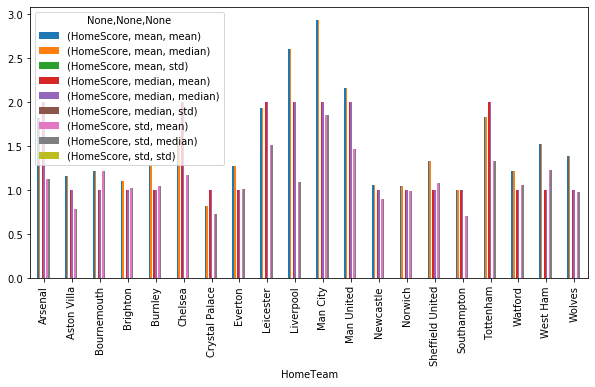

In [21]:
stat_plot(score_stat, "HomeTeam")